# EDA: Exploratory Data Analysis

### Exploratory Data Analysis (EDA) is the process of visualizing and analyzing data to extract insights from it.

#### Author: Sujay Rittikar (SDTP-2020 by Yalgaar)

## Step 1: Importing the required libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Step 2: Importing the Dataset

In [3]:
placements_df = pd.read_csv("placements.csv")

In [4]:
placements_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Step 3: Identifying the features and columns

In [5]:
placements_df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [6]:
len(placements_df.columns)

15

### Identifying the data types

In [7]:
placements_df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [8]:
placements_df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

### Removing unnecessary and non-deterministic features/columns

In [9]:
placements_df = placements_df.drop(['sl_no', 'gender', 'ssc_b', 'hsc_b'], axis=1)

In [11]:
placements_df.head()

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Step 4: Exploring the Categorical Variables

### The Categorical Variables here are: 
#### 1] HSC field category: Science/Arts/Commerce,
#### 2] Work Experience: Yes/No
#### 3] Specialization
#### 4] Placement Status: Placed/Not Placed
#### 5] Type of Degree: Scie&Tech/Comm&Mgmnt/Others

In [12]:
# Let's Explore 'em up!

hsc = placements_df.hsc_s
deg = placements_df.degree_t
exp = placements_df.workex
spec = placements_df.specialisation
st = placements_df.status

In [15]:
hsc

0      Commerce
1       Science
2          Arts
3       Science
4      Commerce
         ...   
210    Commerce
211     Science
212    Commerce
213    Commerce
214     Science
Name: hsc_s, Length: 215, dtype: object

### Unique values in each category:

In [16]:
print("The unique values in hsc category are: " + str(set(hsc)))
print("The unique values in type of degree category are: " + str(set(deg)))
print("The unique values in work experience category are: " + str(set(exp)))
print("The unique values in specialization category are: " + str(set(spec)))
print("The unique values in placement status category are: " + str(set(st)))

The unique values in hsc category are: {'Commerce', 'Arts', 'Science'}
The unique values in type of degree category are: {'Comm&Mgmt', 'Others', 'Sci&Tech'}
The unique values in work experience category are: {'No', 'Yes'}
The unique values in specialization category are: {'Mkt&HR', 'Mkt&Fin'}
The unique values in placement status category are: {'Not Placed', 'Placed'}


### Let's plot some bar plots for our categorical data

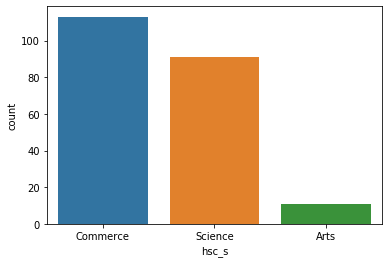

In [17]:
# The counts for HSC category
sns.countplot(placements_df['hsc_s'])

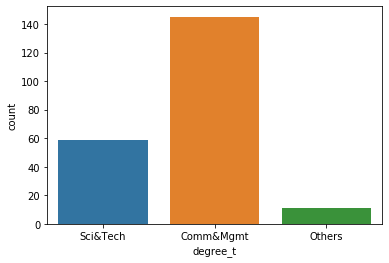

In [18]:
# The counts for Degree category
sns.countplot(placements_df['degree_t'])

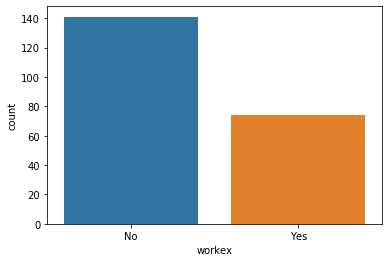

In [19]:
# The counts for the number of people having or not having work experience
sns.countplot(placements_df['workex'])

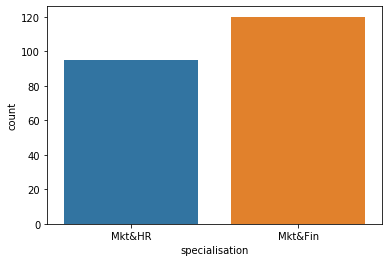

In [20]:
# The counts for the different types of specializations
sns.countplot(placements_df['specialisation'])

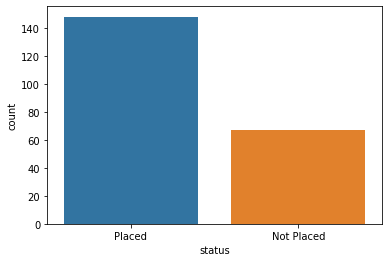

In [21]:
# The placement status of students!
sns.countplot(placements_df['status'])

## Step 5: Finding possible conclusions from the categorical data without forming any basis of the continuous data

### 1] Insights about students taking Science, Arts and Commerce for HSC

In [22]:
sci = len(placements_df[placements_df['hsc_s']=='Science'])
arts = len(placements_df[placements_df['hsc_s']=='Arts'])
comm = len(placements_df[placements_df['hsc_s']=='Commerce'])

In [23]:
print("The total number of students who studied Science as a subject for HSC are: " + str(sci))
print("The total number of students who studied Arts as a subject for HSC are: " + str(arts))
print("The total number of students who studied Commerce as a subject for HSC are: " + str(comm))

The total number of students who studied Science as a subject for HSC are: 91
The total number of students who studied Arts as a subject for HSC are: 11
The total number of students who studied Commerce as a subject for HSC are: 113


In [24]:
print("The percentage of HSC Science students is: " + str(round(100*sci/(sci+arts+comm), 2)))
print("The percentage of HSC Arts students is: " + str(round(100*arts/(sci+arts+comm), 2)))
print("The percentage of HSC Commerce students is: " + str(round(100*comm/(sci+arts+comm), 2)))

The percentage of HSC Science students is: 42.33
The percentage of HSC Arts students is: 5.12
The percentage of HSC Commerce students is: 52.56


### 2] Insights on students taking Scie&Tech, Comm&Mnmnt and Others for Degree

In [25]:
scitech = len(placements_df[placements_df['degree_t']=='Sci&Tech'])
mgmnt = len(placements_df[placements_df['degree_t']=='Comm&Mgmt'])
others = len(placements_df[placements_df['degree_t']=='Others'])

In [26]:
print("The total number of students who graduated in Science and Tech are: " + str(scitech))
print("The total number of students who graduated in Communication and Management are: " + str(mgmnt))
print("The total number of students who graduated in Other departments are: " + str(others))

The total number of students who graduated in Science and Tech are: 59
The total number of students who graduated in Communication and Management are: 145
The total number of students who graduated in Other departments are: 11


In [27]:
print("The percentage of Science and Tech graduated students is: " + str(round(100*scitech/(scitech+mgmnt+others), 2)))
print("The percentage of Communication and Management graduated students is: " + str(round(100*mgmnt/(scitech+mgmnt+others), 2)))
print("The percentage of Other norms graduated students is: " + str(round(100*others/(scitech+mgmnt+others), 2)))

The percentage of Science and Tech graduated students is: 27.44
The percentage of Communication and Management graduated students is: 67.44
The percentage of Other norms graduated students is: 5.12


### 3] Insights on work experience of Students

In [28]:
yes = len(placements_df[placements_df['workex']=='Yes'])
no = len(placements_df[placements_df['workex']=='No'])

In [29]:
print("The students with no work experience are: " + str(no))
print("The students with some work experience are: "+str(yes))

The students with no work experience are: 141
The students with some work experience are: 74


In [30]:
print("The percentage of the students with no experience: " + str(round(100*no/(yes+no), 2)))
print("The percentage of the students with experience: " + str(round(100*yes/(yes+no), 2)))

The percentage of the students with no experience: 65.58
The percentage of the students with experience: 34.42


### 4] Insights on Specializations of students

In [31]:
hr = len(placements_df[placements_df['specialisation']=='Mkt&HR'])
fin = len(placements_df[placements_df['specialisation']=='Mkt&Fin'])

In [32]:
print("The students with specialization in Marketing and HR are: " + str(hr))
print("The students with specialization in Marketing and Finance are: "+str(fin))

The students with specialization in Marketing and HR are: 95
The students with specialization in Marketing and Finance are: 120


In [33]:
print("The percentage of the students with specialization in Marketing and HR are: " + str(round(100*hr/(hr+fin), 2)))
print("The percentage of the students with specialization in Marketing and Finance are: " + str(round(100*fin/(hr+fin), 2)))

The percentage of the students with specialization in Marketing and HR are: 44.19
The percentage of the students with specialization in Marketing and Finance are: 55.81


### 5] Insights on Placement status of Students

In [34]:
placed = len(placements_df[placements_df['status'] == 'Placed'])
not_placed = len(placements_df[placements_df['status'] == 'Not Placed'])

In [35]:
print("The number of students who got placed is: " + str(placed))
print("The number of students who didn't get placed is: "+ str(not_placed))

The number of students who got placed is: 148
The number of students who didn't get placed is: 67


In [36]:
print("The percentage of students who got placed is: "+ str(round(100*placed/(placed+not_placed), 2)))
print("The percentage of students who didn't get placed is: "+ str(round(100*not_placed/(placed+not_placed), 2)))

The percentage of students who got placed is: 68.84
The percentage of students who didn't get placed is: 31.16


## Step 6: Explore the continuous Data

In [37]:
cont = placements_df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']]

In [38]:
cont.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0
3,56.00,52.00,52.00,66.0,59.43,NaN
4,85.80,73.60,73.30,96.8,55.50,425000.0


In [39]:
cont.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [40]:
placed = cont[cont['salary']>=0]

In [41]:
placed.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405
std,8.715445,9.329268,6.518087,13.729333,5.884583,93457.452420
min,49.000000,50.830000,56.000000,50.000000,52.380000,200000.000000
25%,65.000000,63.000000,65.000000,60.000000,57.772500,240000.000000
50%,72.500000,68.000000,68.000000,72.000000,62.245000,265000.000000
75%,78.125000,75.250000,72.422500,85.000000,66.760000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [42]:
placed.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.293416,0.380657,0.317892,0.430560,0.035330
hsc_p,0.293416,1.000000,0.221307,0.284672,0.329983,0.076819
degree_p,0.380657,0.221307,1.000000,0.217683,0.494093,-0.019272
etest_p,0.317892,0.284672,0.217683,1.000000,0.284143,0.178307
mba_p,0.430560,0.329983,0.494093,0.284143,1.000000,0.175013
salary,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


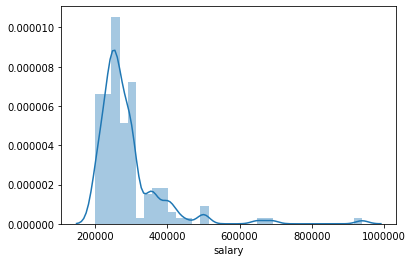

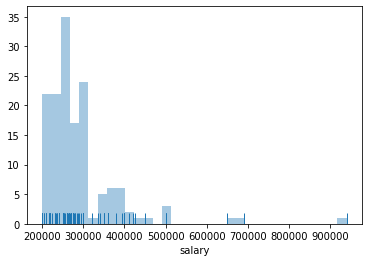

In [43]:
# Univariate Distribution

# Histogram
sns.distplot(placed["salary"])
plt.show()

# Hiding the KDE, using the rug
sns.distplot(placed["salary"], kde=False, rug=True)
plt.show()

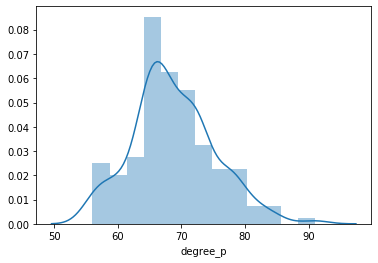

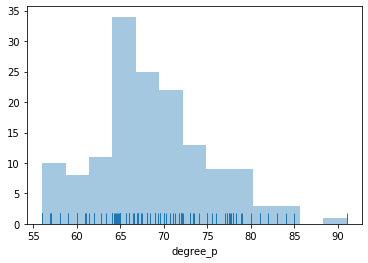

In [44]:
sns.distplot(placed["degree_p"])
plt.show()
sns.distplot(placed["degree_p"], kde=False, rug=True)
plt.show()

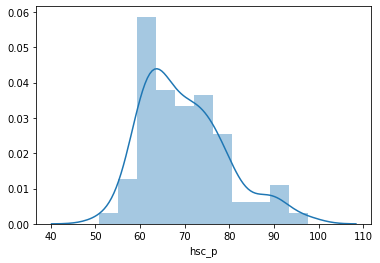

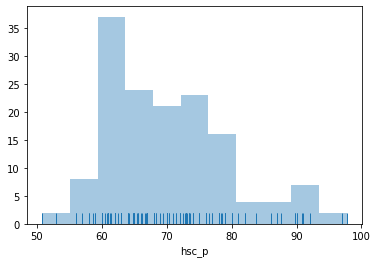

In [45]:
sns.distplot(placed["hsc_p"])
plt.show()
sns.distplot(placed["hsc_p"], kde=False, rug=True)
plt.show()

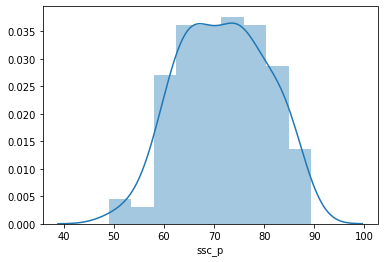

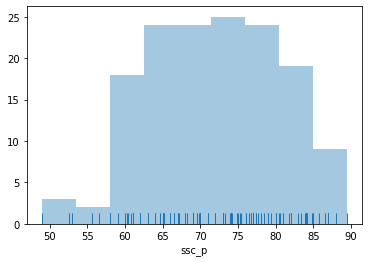

In [46]:
sns.distplot(placed["ssc_p"])
plt.show()
sns.distplot(placed["ssc_p"], kde=False, rug=True)
plt.show()

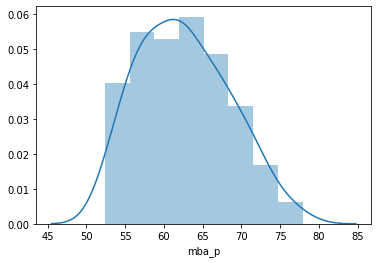

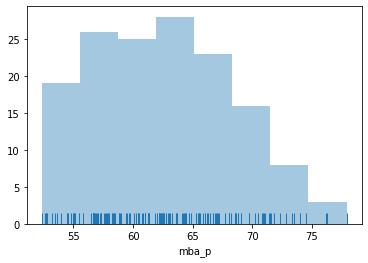

In [47]:
sns.distplot(placed["mba_p"])
plt.show()
sns.distplot(placed["mba_p"], kde=False, rug=True)
plt.show()

/home/sujay/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


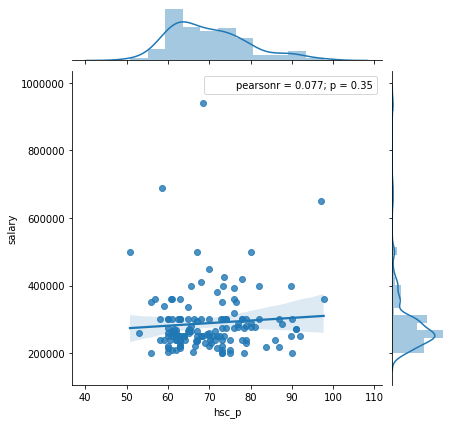

In [48]:
sns.jointplot(placed['hsc_p'], placed['salary'], kind = "reg").annotate(stats.pearsonr)
plt.show()

/home/sujay/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


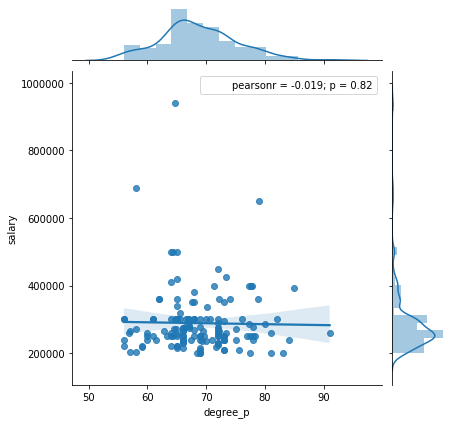

In [49]:
sns.jointplot(placed['degree_p'], placed['salary'], kind = "reg").annotate(stats.pearsonr)
plt.show()

/home/sujay/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


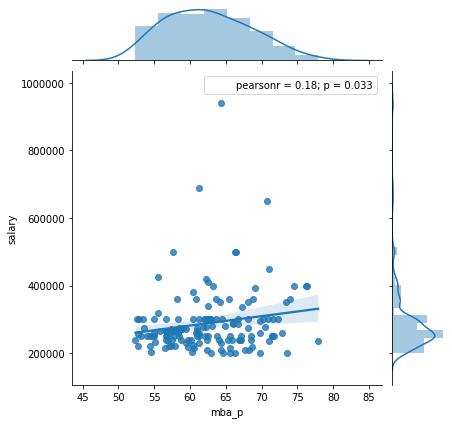

In [50]:
sns.jointplot(placed['mba_p'], placed['salary'], kind = "reg").annotate(stats.pearsonr)
plt.show()

## Step 7: Digging out Outliers

### Do we actually need it??